# <h1 align="center"> ADY201 final project <h1/>

## GROUP: 1
### Group member: Đỗ Tùng Dương (Leader) - HE194222
### Group member: Lê Hoàng Tú - HE190018
### Group member: Nguyễn Vũ Anh - HE191200
### Group member: Đỗ Tiến Anh - HE190404

# 1. Select an appropriate dataset

Dataset: Student_performance_data
- File: `Student_performance_data _.csv` (cùng thư mục với notebook này)
- Kích thước: ~2392 hàng, 15 cột
- Đáp ứng yêu cầu:
  - ≥ 500 hàng dữ liệu ✔️
  - ≥ 5 cột đặc trưng ✔️

### Chi tiết file: Student_performance_data

- Kích thước: 2392 hàng × 15 cột (không có giá trị thiếu theo pf.info()).
- Mục tiêu: `GradeClass` (phân lớp đa nhãn 5 lớp: 0=A, 1=B, 2=C, 3=D, 4=F).
- Lưu ý: không sử dụng `GPA` làm feature (leakage). `StudentID` cũng nên loại bỏ.

Các cột (kiểu dữ liệu & chú thích)
- StudentID (int): mã định danh học sinh (1001–3392) — dùng để tham chiếu, không dùng làm feature.
- Age (int): 15–18.
- Gender (int): 0 = Male, 1 = Female.
- Ethnicity (int): 0=Caucasian, 1=African American, 2=Asian, 3=Other.
- ParentalEducation (int): 0=None, 1=High School, 2=Some College, 3=Bachelor's, 4=Higher (có tính thứ tự).
- StudyTimeWeekly (float): giờ học/tuần (khoảng 0–20).
- Absences (int): số ngày vắng (khoảng 0–30).
- Tutoring (int): 0=No, 1=Yes.
- ParentalSupport (int): 0=None, 1=Low, 2=Moderate, 3=High, 4=Very High (có thứ tự).
- Extracurricular (int): 0/1. 0 không tham gia, 1 tham gia.
- Sports (int): 0/1. 0 không tham gia, 1 tham gia.
- Music (int): 0/1. 0 không tham gia, 1 tham gia.
- Volunteering (int): 0/1. 0 không tham gia, 1 tham gia.
- GPA (float): điểm trung bình — KHÔNG đưa vào features (leakage).
- GradeClass (float/int): target (0..4) — hiện có kiểu số thực trong df, nên cast về int khi modeling.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('Student_performance_data _.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# 2. Mục tiêu mô hình (Modeling objective)

Bài toán: phân loại đa lớp dự đoán điểm chữ cuối kỳ (`GradeClass` ∈ {A, B, C, D, F}).

GradeClass: Classification of students' grades based on GPA:
```
0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)
```

- Target variable: `GradeClass`
- Feature variables:
  - Numerical features:  `StudyTimeWeekly`, `Absences`
  - Categorical features:  , `Gender`, `Ethnicity`, `ParentalEducation`, `Tutoring`, `ParentalSupport`, `Extracurricular`, `Sports`, `Music`, `Volunteering`
- Các biến đã loại khỏi features: `GPA`, `GradeClass`, `Age`, `StudentID`

# 3. Tiền xử lý dữ liệu (Preprocessing Data)


In [4]:
print("Kiểm tra dữ liệu có ô nào null không:", df.isnull().values.any())

Kiểm tra dữ liệu có ô nào null không: False


- Tiến hành đánh giá tầm quan trọng của đặc điểm:
    - Xác định cột nào là số và cột nào là phân loại
    - Mã hóa các cột phân loại để chuyển đổi các biến đối tượng thành số
    - Điều chỉnh tỷ lệ các cột số để đảm bảo rằng các số lớn có tác động tương đương đến mô hình của chúng ta như các số nhỏ

In [5]:
#Xác định cột số và cột phân loại
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for col in columns:
    # Nếu cột có hơn 5 giá trị khác nhau => xem là numeric
    if len(df[col].unique()) > 5:
        numeric_columns.append(col)
    else:
        categoric_columns.append(col)

# Giả sử cột đầu tiên là ID hoặc không phải dạng số => loại bỏ khỏi numeric
if len(numeric_columns) > 0:
    numeric_columns = numeric_columns[1:]

print('\n Numerical features:')
print(numeric_columns)

print('\n Categorical features:')
print(categoric_columns)


 Numerical features:
['StudyTimeWeekly', 'Absences', 'GPA']

 Categorical features:
['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [18]:
# Encode categorical features bằng LabelEncoder
label_encoder = LabelEncoder()
for column in categoric_columns:
    df[column] = label_encoder.fit_transform(df[column])

#  Scale numeric features bằng StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# --- Kiểm tra kết quả ---
print("\n Dữ liệu sau khi mã hóa và chuẩn hóa:")
print(df.head())


 Dữ liệu sau khi mã hóa và chuẩn hóa:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001    2       1          0                  2         1.780336   
1       1002    3       0          0                  1         0.997376   
2       1003    0       0          2                  3        -0.984045   
3       1004    2       1          0                  3         0.045445   
4       1005    2       1          0                  2        -0.902311   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0 -0.890822         1                2                0       0      1   
1 -1.717694         0                1                0       0      0   
2  1.353542         0                2                0       0      0   
3 -0.063951         0                3                1       0      0   
4  0.290422         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  1.

In [6]:
# Xác định biến mục tiêu (target feature)
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y = df['GradeClass']

# Train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.head()

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
653,0,2,3,1.901131,7,0,2,0,0,0,0
200,0,1,2,10.546218,18,0,1,0,0,1,0
1606,1,1,0,6.177218,27,0,1,0,1,0,0
1032,0,2,1,6.108270,24,1,3,1,0,1,0
1293,1,1,2,0.305297,23,0,0,1,0,0,0


# 4. Data Visualization

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

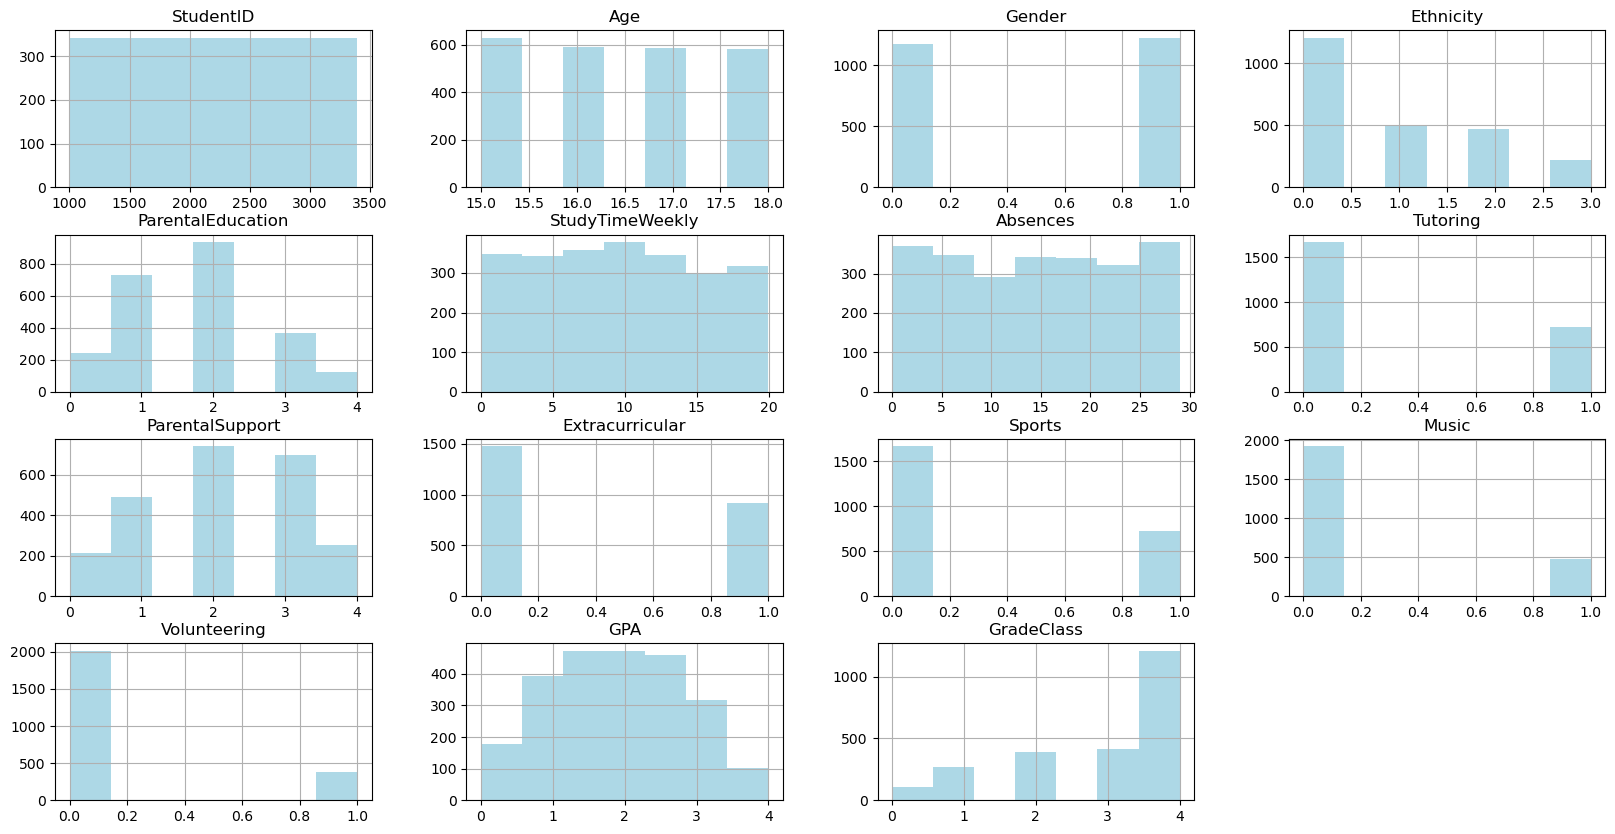

In [7]:
df.hist(figsize=(20, 10), bins=7, color="lightblue")

**Từ biểu đồ histogram ở trên, ta có thể kết luận:**
- StudentID không có phân phối và về mặt logic sẽ không ảnh hưởng đến Grade
- Chỉ có 4 lứa tuổi
- Có 4 loại dân tộc
- Có nhiều học sinh điểm thấp, đa số là điểm F

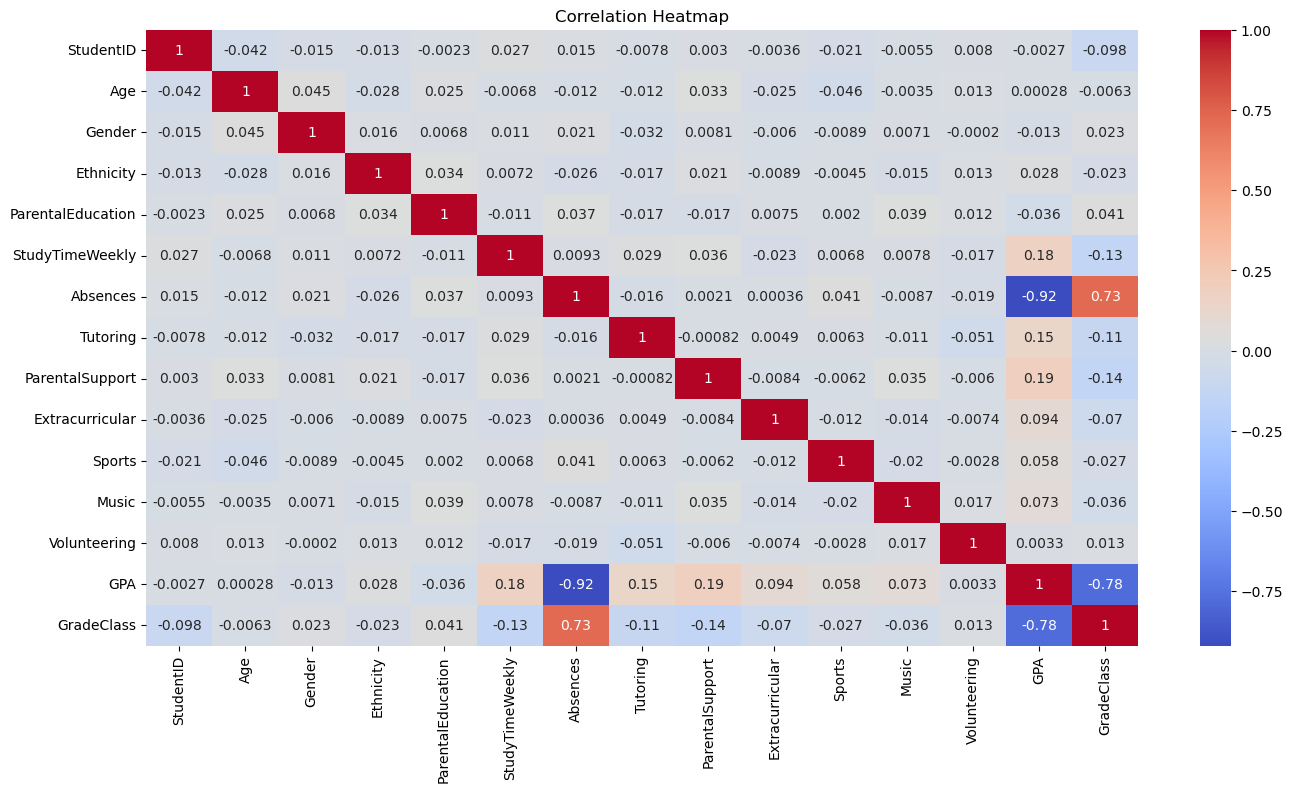

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Train machine learning model

In [9]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    if col != "GradeClass":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [11]:
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]

In [12]:
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
   
}

model_names = []
accuracies = []

for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# === Tạo DataFrame chứa kết quả ===
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies}).sort_values(by='Accuracy', ascending=False)

print("\nBảng kết quả:")
print(df_models)

# === Vẽ biểu đồ bằng Plotly ===
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies', color='Accuracy', text='Accuracy')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression accuracy: 0.67
Support Vector Machine accuracy: 0.49
Random Forest accuracy: 0.92

Bảng kết quả:
                    Model  Accuracy
2           Random Forest  0.916493
0     Logistic Regression  0.668058
1  Support Vector Machine  0.494781


# 6. Model evaluation

🔹 Mô hình tốt nhất: Random Forest (Accuracy = 0.916)


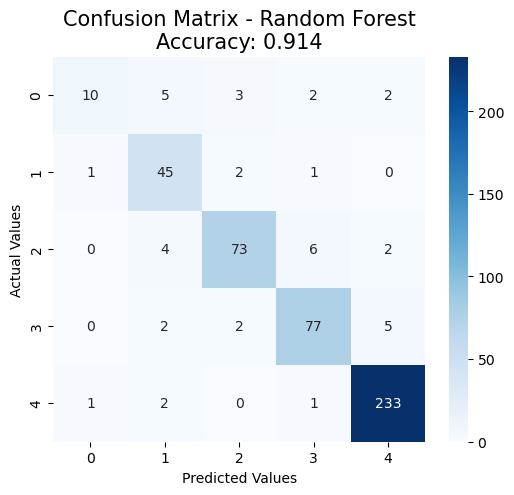

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# === Chọn mô hình tốt nhất dựa trên kết quả df_models ===
best_index = df_models['Accuracy'].idxmax()
best_model_name = df_models.loc[best_index, 'Model']
best_accuracy = df_models.loc[best_index, 'Accuracy']
best_model = classification_models[best_model_name]

print(f"🔹 Mô hình tốt nhất: {best_model_name} (Accuracy = {best_accuracy:.3f})")

# === Huấn luyện mô hình tốt nhất ===
best_model.fit(X_train, y_train)

# === Dự đoán trên tập test ===
y_pred = best_model.predict(X_test)

# === Tính toán và vẽ Confusion Matrix ===
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Confusion Matrix - {best_model_name}\nAccuracy: {score}', size=15)
plt.show()

# 7. Tuning the Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from scipy.stats import randint

# === 1. Khởi tạo mô hình cơ bản ===
model = RandomForestClassifier(random_state=42)

# === 2. Cấu hình cross-validation ===
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# === 3. Tạo phân phối giá trị ngẫu nhiên cho các hyperparameters ===
param_dist = {
    'n_estimators': randint(100, 500),          # số cây trong rừng
    'max_depth': [None, 5, 10, 20, 30],         # độ sâu tối đa
    'min_samples_split': randint(2, 10),        # min số mẫu để chia nhánh
    'min_samples_leaf': randint(1, 5),          # min số mẫu mỗi lá
    'max_features': ['sqrt', 'log2', None],     # số đặc trưng chọn tại mỗi split
    'bootstrap': [True, False]                  # có lấy mẫu lại hay không
}

# === 4. Tạo RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,                 # số tổ hợp ngẫu nhiên sẽ thử
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# === 5. Huấn luyện ===
result = random_search.fit(X_train, y_train)

best_rf = result.best_estimator_

test_acc = best_rf.score(X_test, y_test)
print(f"Test Accuracy after tuning: {test_acc:.3f}")


Fitting 30 folds for each of 50 candidates, totalling 1500 fits
Test Accuracy after tuning: 0.927


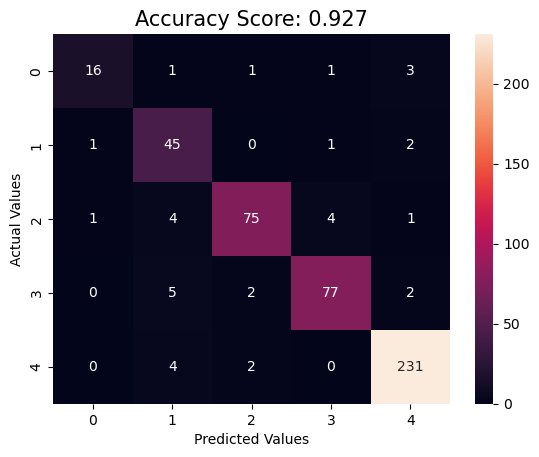

In [22]:
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()